## OM NAMAH SHIVAAY

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sn
import numpy as np
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


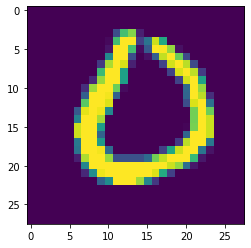

In [5]:
plt.imshow(X_train[2500])

In [6]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [6]:
ANN=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(25,activation='relu'),
        keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(12,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
ANN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ANN.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 2.6798 - accuracy: 0.5194
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5745 - accuracy: 0.8083
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5083 - accuracy: 0.8326
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4606 - accuracy: 0.8623
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4064 - accuracy: 0.8801


In [14]:
y_pred = ANN.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

In [8]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       980
           1       0.98      0.97      0.98      1135
           2       0.88      0.89      0.89      1032
           3       0.92      0.83      0.87      1010
           4       0.86      0.94      0.90       982
           5       0.78      0.75      0.76       892
           6       0.92      0.92      0.92       958
           7       0.89      0.93      0.91      1028
           8       0.82      0.87      0.84       974
           9       0.92      0.82      0.87      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [15]:
ANN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8887


[0.39297765493392944, 0.888700008392334]

## CNN

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [9]:
CNN=keras.Sequential([
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [10]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 41s 4ms/step - loss: 2.4829 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0903 - accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0567 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0432 - accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0323 - accuracy: 0.9898


In [11]:
y_pred = CNN.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

In [12]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       980
           1       0.80      0.99      0.88      1135
           2       0.97      0.80      0.87      1032
           3       0.96      0.98      0.97      1010
           4       0.85      0.88      0.87       982
           5       0.90      0.99      0.95       892
           6       0.98      0.41      0.58       958
           7       0.99      0.96      0.97      1028
           8       0.99      0.95      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.88     10000
weighted avg       0.91      0.89      0.89     10000



In [13]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9777


[0.08842986822128296, 0.9776999950408936]